# `Life Excpectancy and GDP`

`Guiding Questions:`
- How has GDP behaved over the period we're investigating?
- How has life expectancy behaved over the same period?
- Is there a relationship between GDP and life expectancy?
- Is that relationship similar across countries? Or does it affect some countries more than others?

# Step 1: Import and Clean Data

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [123]:
# Read in CSV as df
df = pd.read_csv('all_data.csv')

# Examine the columns and a random sample from the dataset
df.sample(10)

,Country,Year,Life expectancy at birth (years),GDP
28,China,2012,75.4,8.560550e+12
61,Mexico,2013,76.6,1.261980e+12
56,Mexico,2008,75.6,1.101280e+12
22,China,2006,74.2,2.752130e+12
7,Chile,2007,78.9,1.736060e+11
16,China,2000,71.7,1.211350e+12
88,Zimbabwe,2008,48.2,4.415703e+09
82,Zimbabwe,2002,44.8,6.342116e+09
91,Zimbabwe,2011,54.9,1.209845e+10
38,Germany,2006,79.6,3.002450e+12


In [124]:
# Check for nulls, Dtypes, and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [125]:
# Rename life expectancy column with shorter name with no spaces
df = df.rename(columns={'Life expectancy at birth (years)' : 'Life_Expectancy'}).copy()

In [126]:
# Check for duplicates
df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [127]:
# Check categorical variables for standardizations
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### `Notes:`

The dataset is both clean and relatively small with <100 rows. There are no nulls or duplicates and each row represents an individual county's GDP and life expectancy for a given year in the period 2000 - 2015. 

Six countries are represented: Chile, China, Germany, Mexico, USA, and Zimbabwe.

Data types for each column appear correct; 'Year' can be treated as both a numerical and a categorical variable, depending on context, so can remain an int64.

# Step 2: Explore and Visualize the Dataset

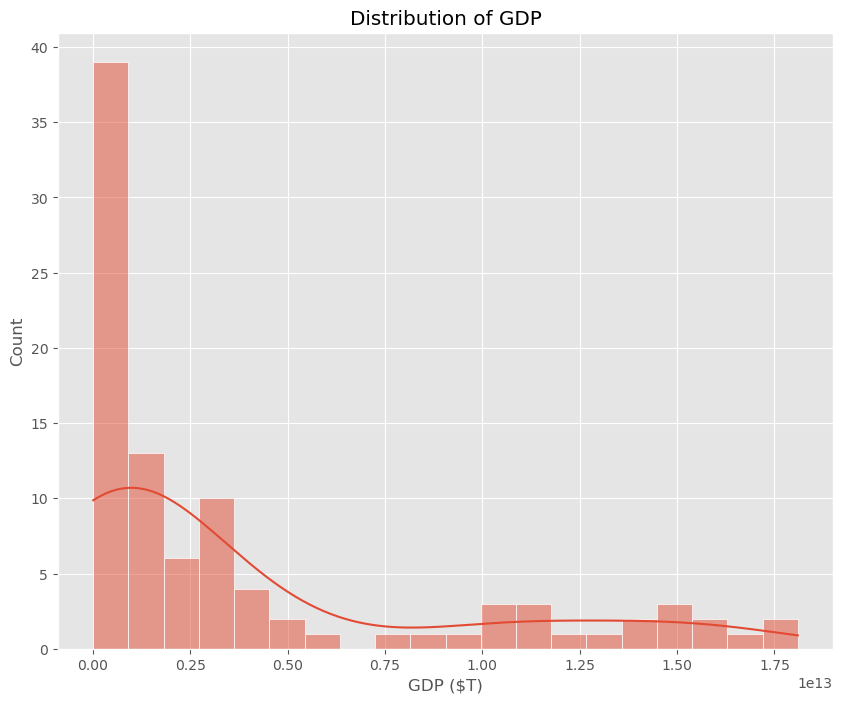

In [128]:
plt.figure(figsize=(10,8))
sns.histplot(df.GDP, kde=True, bins=20, edgecolor='white')
plt.title('Distribution of GDP')
plt.xlabel('GDP ($T)')

plt.show()

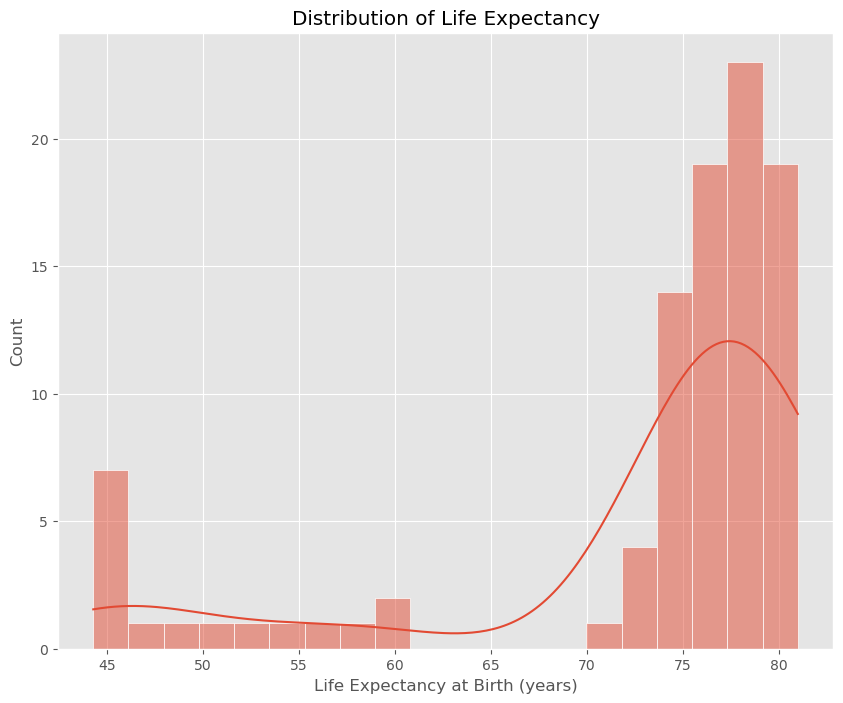

In [129]:
plt.figure(figsize=(10,8))
sns.histplot(df.Life_Expectancy, kde=True, bins=20, edgecolor='white')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy at Birth (years)')

plt.show()

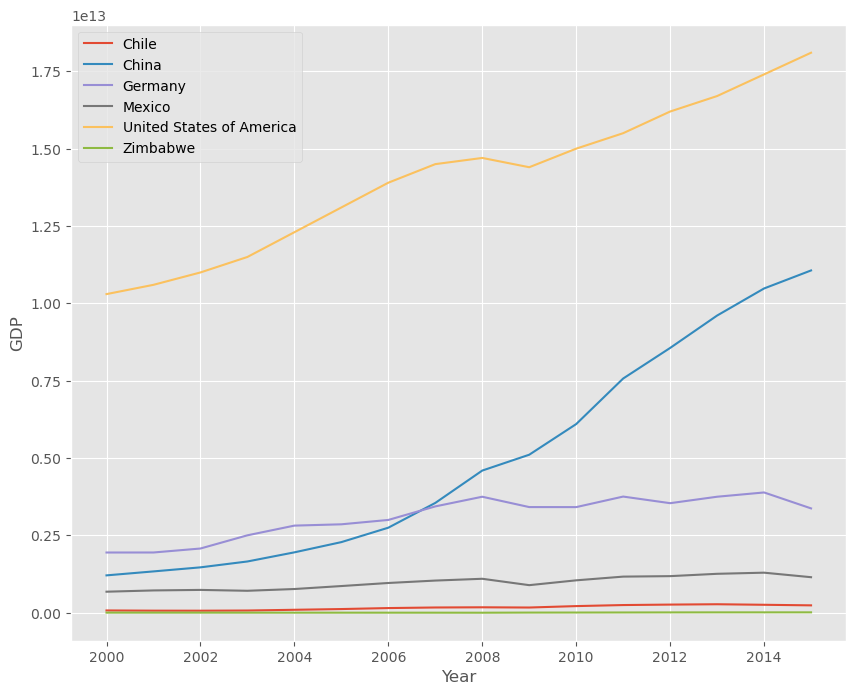

In [130]:
plt.figure(figsize=(10,8))
sns.lineplot(df, x='Year', y='GDP', hue='Country')
plt.legend()
plt.show()

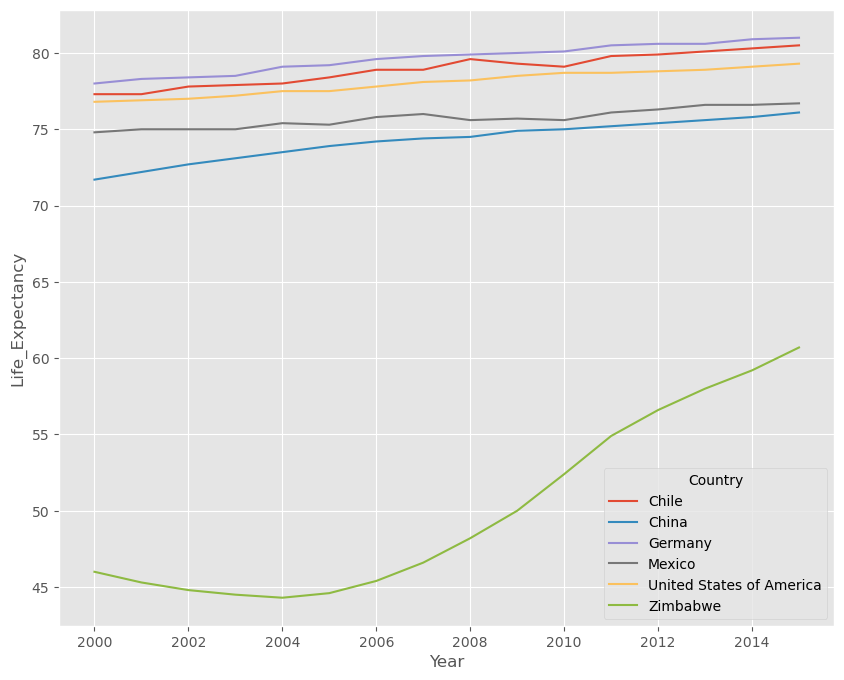

In [131]:
plt.figure(figsize=(10,8))
sns.lineplot(df, x='Year', y='Life_Expectancy', hue='Country')
plt.show()

In [132]:
df_means_by_year = df.groupby('Year')[['Life_Expectancy', 'GDP']].agg('mean').reset_index()
df_means_by_year

,Year,Life_Expectancy,GDP
0,2000,70.766667,2.371583e+12
1,2001,70.833333,2.448752e+12
2,2002,70.950000,2.561221e+12
3,2003,71.033333,2.743446e+12
4,2004,71.300000,2.991647e+12
5,2005,71.483333,3.207074e+12
6,2006,71.950000,3.463349e+12
7,2007,72.300000,3.785750e+12
8,2008,72.666667,4.055986e+12
9,2009,73.066667,4.000653e+12


In [133]:
df_means_by_country = df.groupby('Country')[['Life_Expectancy', 'GDP']].agg('mean').reset_index()
df_means_by_country

,Country,Life_Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


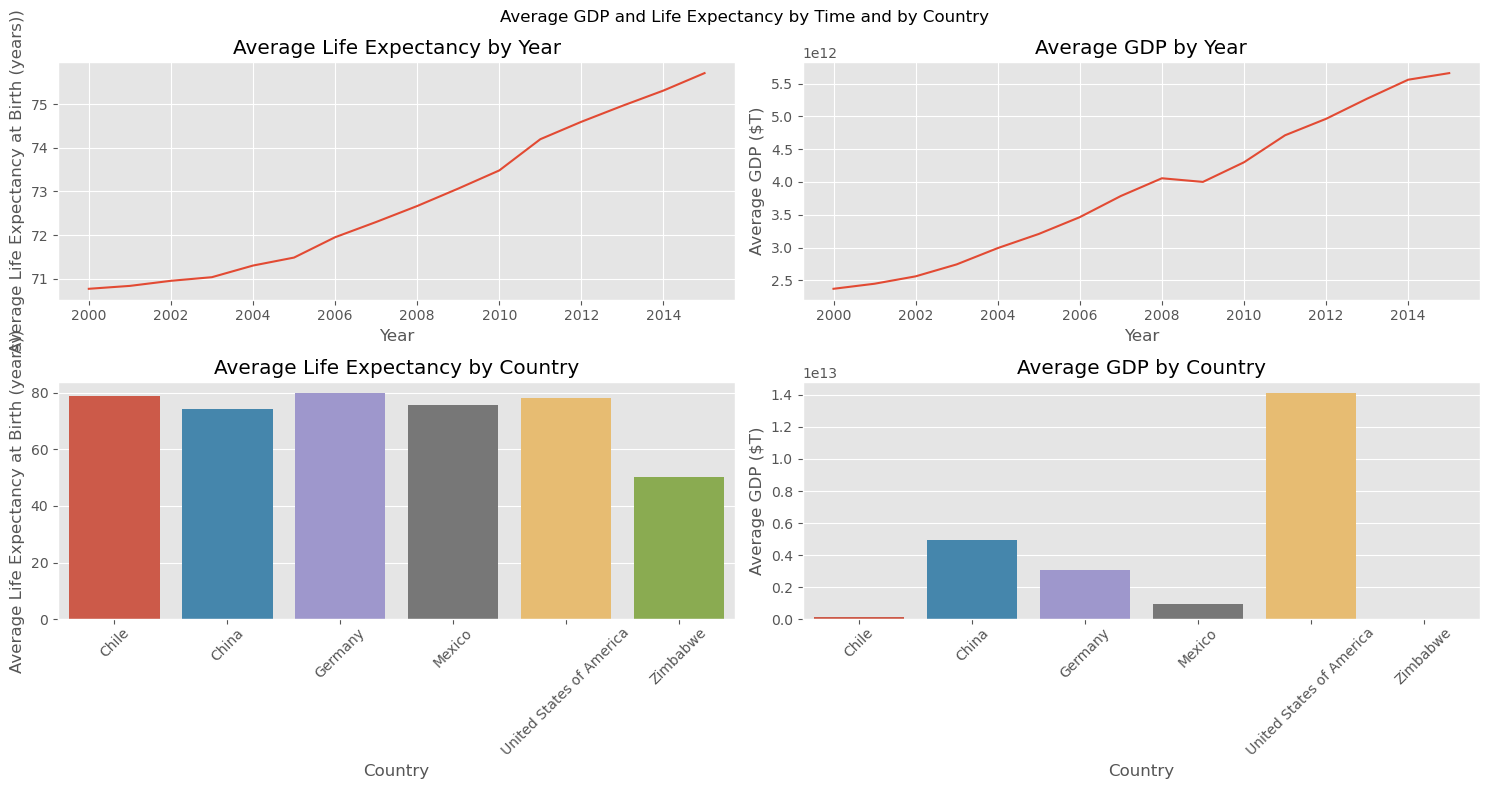

In [134]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(15,8), layout='tight')
fig.suptitle('Average GDP and Life Expectancy by Time and by Country')

sns.lineplot(ax=ax1, data=df_means_by_year, x='Year', y='Life_Expectancy')
ax1.set_title('Average Life Expectancy by Year')
ax1.set_ylabel('Average Life Expectancy at Birth (years))')

sns.lineplot(ax=ax2, data=df_means_by_year, x='Year', y='GDP')
ax2.set_title('Average GDP by Year')
ax2.set_ylabel('Average GDP ($T)')

sns.barplot(ax=ax3, data=df_means_by_country, x='Country', y='Life_Expectancy')
ax3.set_title('Average Life Expectancy by Country')
ax3.set_ylabel('Average Life Expectancy at Birth (years))')
ax3.tick_params(axis='x', 
                labelrotation=45, 
                pad=1)

sns.barplot(ax=ax4, data=df_means_by_country, x='Country', y='GDP')
ax4.set_title('Average GDP by Country')
ax4.set_ylabel('Average GDP ($T)')
ax4.tick_params(axis='x', 
                labelrotation=45, 
                pad=1)


plt.show()

c:\Users\canor\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


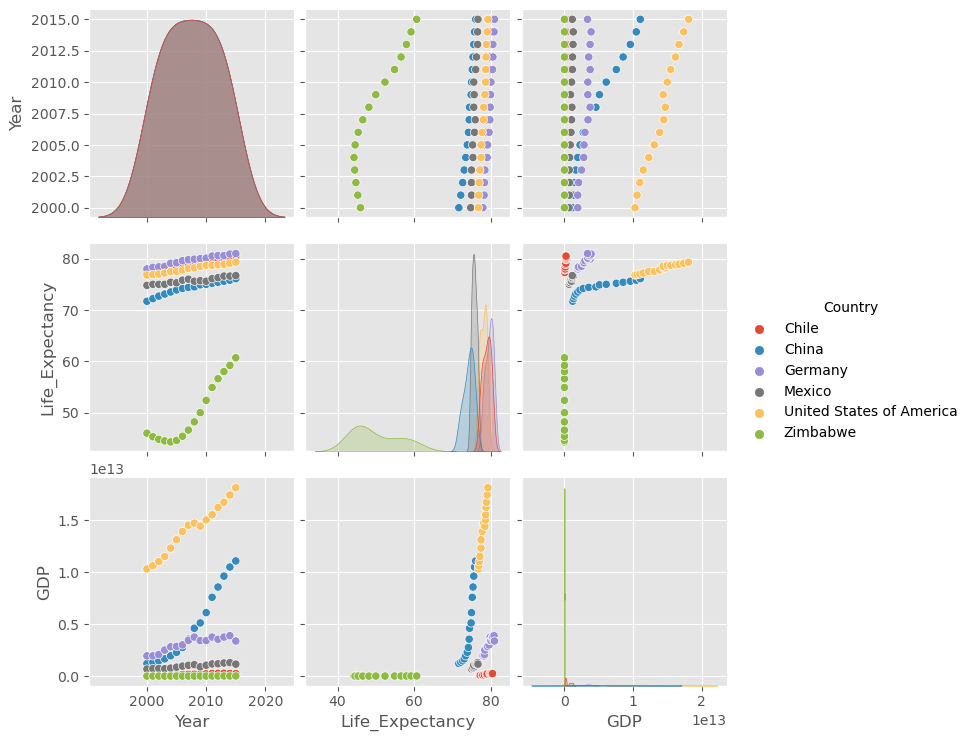

In [135]:
sns.pairplot(df, hue='Country')
plt.show()

c:\Users\canor\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


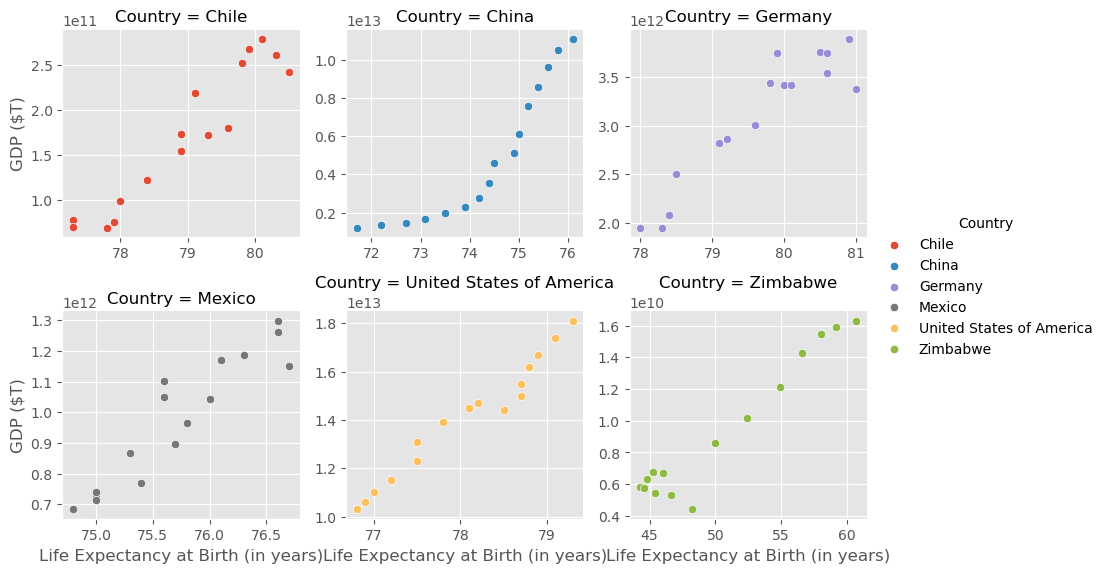

In [136]:
graph = sns.FacetGrid(df, 
                      col="Country", 
                      col_wrap=3,
                      hue = "Country",
                      sharey = False, 
                      sharex = False)
graph = (graph.map(sns.scatterplot,"Life_Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life Expectancy at Birth (in years)", "GDP ($T)"))

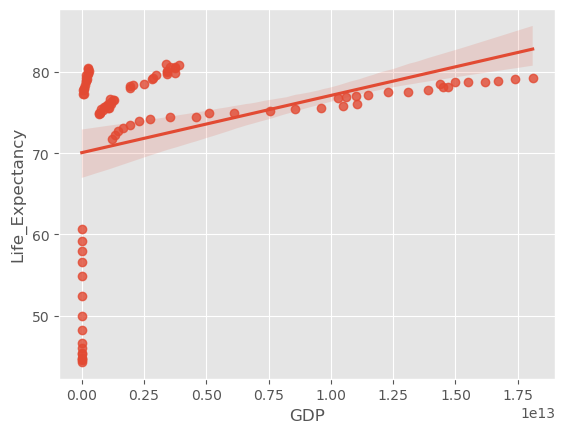

In [137]:
sns.regplot(data=df, x='GDP', y='Life_Expectancy')
ax1.set_title('Average Life Expectancy by Year')
ax1.set_ylabel('Average Life Expectancy at Birth (years))')

plt.show()

# sns.lmplot(df, x='GDP', y='Life_Expectancy')
# plt.show()

c:\Users\canor\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


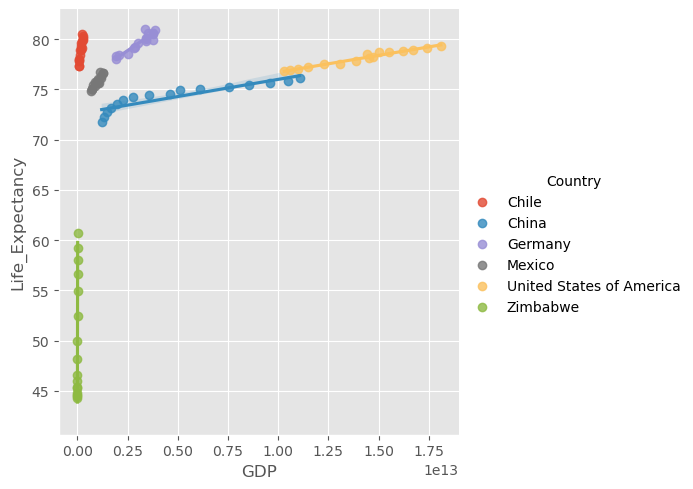

In [138]:
sns.lmplot(df, x='GDP', y='Life_Expectancy', hue='Country')
plt.show()

c:\Users\canor\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


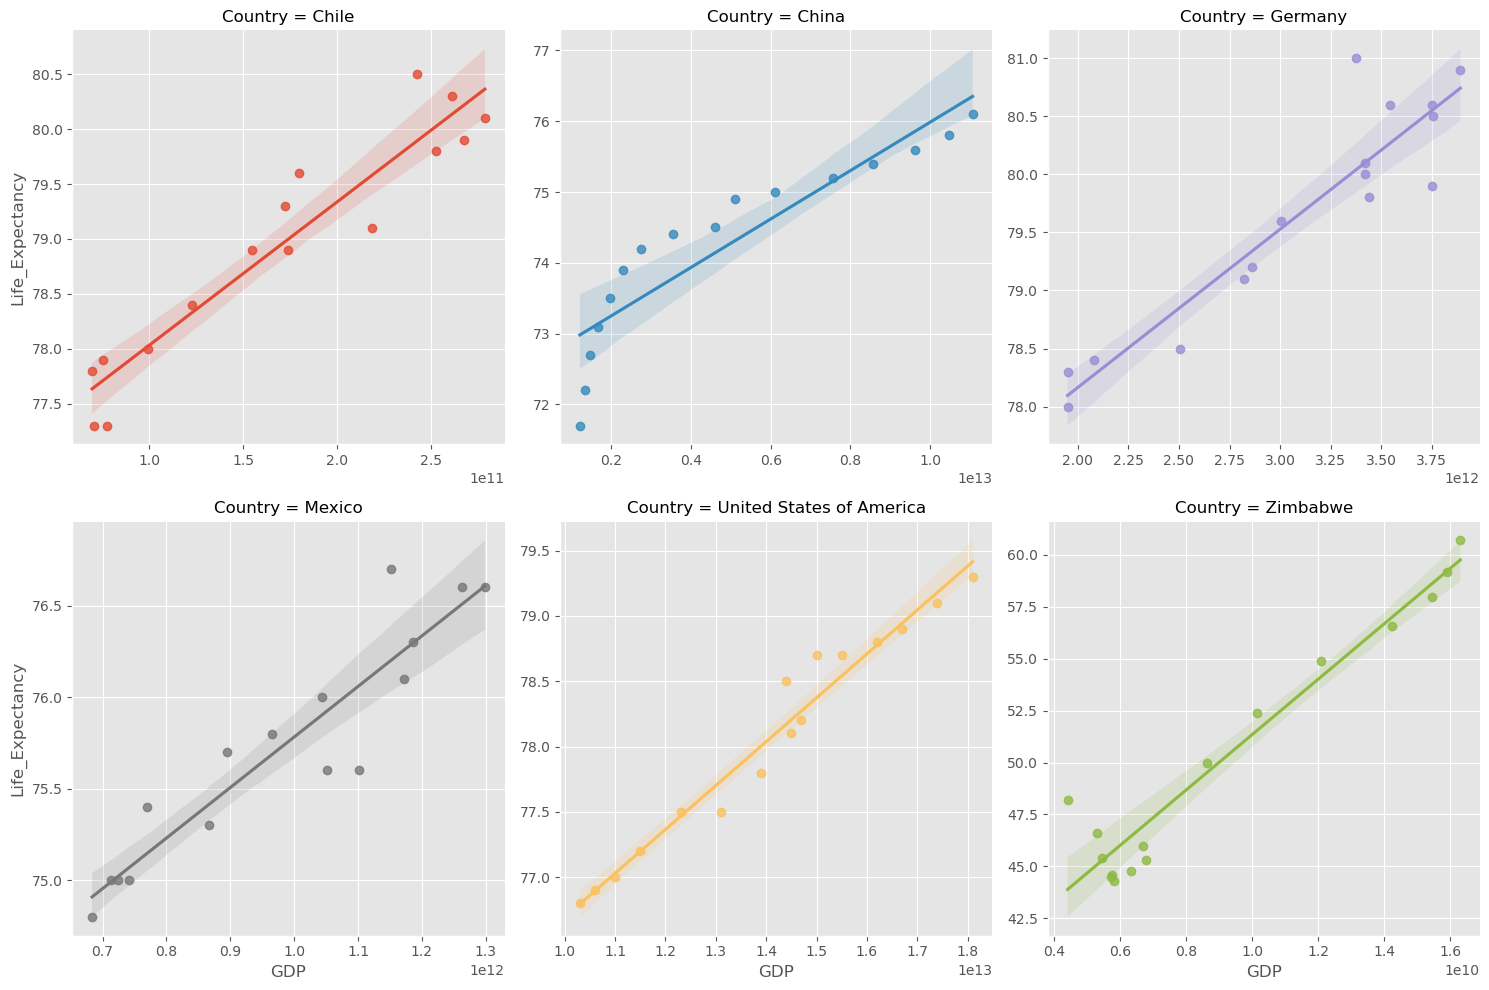

In [141]:
sns.lmplot(df, x='GDP', y='Life_Expectancy', col='Country', col_wrap=3, hue='Country', facet_kws=dict(sharex=False, sharey=False))
plt.show()